# National Prior Knowledge Test in Programming
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The National Prior Knowledge Test in Programming is a tool for assessing students’ programming skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges in Norway.  The goal of the test is to evaluate students’ level of knowledge regarding the curriculum taught at higher education institutions, regardless of what they have learned in secondary school. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge. The test primarily emphasizes programming taught in mathematics curriculum, as it is the most prevalent source of programming knowledge.

This Notebook is a dynamic report of the results from 2023. The (static) written report can be found here: https://programmeringstesten.no/ 

### Imports

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for amigious data.

`grade_submissions.py` replaces all responses with the number of points they recieved based on the rubric (`rubric.json`)

In [161]:
!python clean_data.py
!python grade_submissions.py

Replace escape characters: dict_items([('&lt;', '<'), ('&gt;', '>'), ('&#61;', '='), ('&#34;', '"'), ('&#43;', '+')])
Replace all ambigious institutions with standardized labels: ['UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU']
Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
Rename columns with simpler titles. Easier to use in analysis.
Removed all institutions that are not in: ['UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU']
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Removed false entries
Removed blank submissions: 57
Max score: 22.599999999999998
Submissions to be graded: 2030
Submissions graded.


### Graded dataset

In [294]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['UniversityExperience'] == 'Nei')]

### Non graded dataset
This dataset is used when looking at what the students answered for each task.

In [295]:
# Specify the path of the data file
path = "data/"
filename = path + "clean.csv"
df_tasks = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df_tasks = df_tasks[(df_tasks['UniversityExperience'] == 'Nei')]

### Filter the dataframe
Do you want to look at a specific subset of students?
Use the next cell to filter the students based on your criteria.

To reset the dataframe, simply run the cell above.

In [296]:
# Filter by institution
specific_institutions = ['UiO'] # 'UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU', ' '
df = df[(df['Institution'].isin(specific_institutions))]
df_tasks = df_tasks[(df_tasks['Institution'].isin(specific_institutions))]

In [297]:
# Filter by Graduate Year
specific_graduateyears = ['Før 2020', '2020', '2021 - 2022', '2023'] # 'Før 2020', '2020', '2021 - 2022', '2023'
#df = df[(df['GraduateYear'].isin(specific_graduateyears))]
#df_tasks = df_tasks[(df_tasks['GraduateYear'].isin(specific_graduateyears))]

In [298]:
# Filter by Gender
specific_genders = ['f', 'm', ' '] # 'f', 'm', ' '
#df = df[(df['Gender'].isin(specific_genders))]
#df_tasks = df_tasks[(df_tasks['Gender'].isin(specific_genders))]

## Demographics
See the background of the students.

In [299]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 60 student submissions.



### Institutions
Note that there are a large number of submissions that are blank. This is due to the students submitting ambigious answers, which have not been labled by `clean_data.py`.

Institution
UiO    60
Name: count, dtype: int64


<Axes: ylabel='count'>

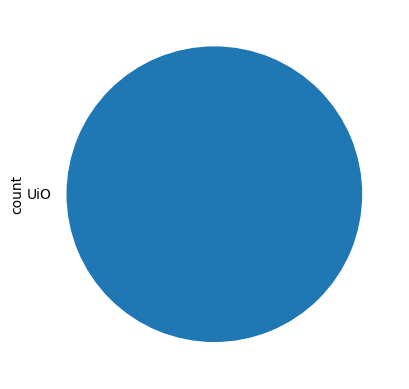

In [300]:
institutions = df.Institution.unique()

institution_column = "Institution"
print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Graduate Year

GraduateYear
2023           26
2021 - 2022    19
Før 2020       13
2020            1
Name: count, dtype: int64


<Axes: ylabel='count'>

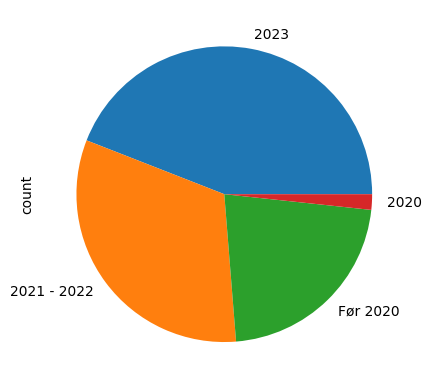

In [301]:
years = df.GraduateYear.unique()

graduateyear_column = "GraduateYear"
print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie()

### Gender

Gender
m    35
f    23
      2
Name: count, dtype: int64
Gender
m    0.583333
f    0.383333
     0.033333
Name: proportion, dtype: float64


<Axes: ylabel='count'>

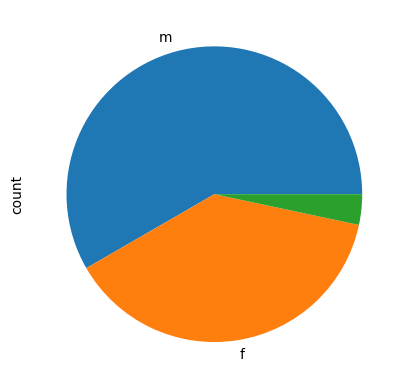

In [302]:
genders = df.Gender.unique()
gender_column = "Gender"

print(df[gender_column].value_counts())
print(df[gender_column].value_counts(normalize=True))
df[gender_column].value_counts().plot.pie()

## Educational Background
What courses have these students taken?

### Elective Programming Courses
During the secondary school phase, students have the option to take three elective courses in programming: *Information Technology 1* (IT1), *Information Technology 2* (IT2), and *Programming and Modelling X* (PMX). 

In [303]:
# Make new column for NO elective programming course
courses = ['Informasjonsteknologi 1 (IT1)', 'Informasjonsteknologi 2 (IT2)', 'Programmering og modellering X']
df_temp = df[(~df['IT1'].isin(courses))]
df_temp = df_temp[(~df_temp['IT2'].isin(courses))]
df_temp = df_temp[(~df_temp['PMX'].isin(courses))]
df_temp['NoElective'] = ~df_temp['IT1'].isin(courses)

df['NoElective'] = df_temp['NoElective']

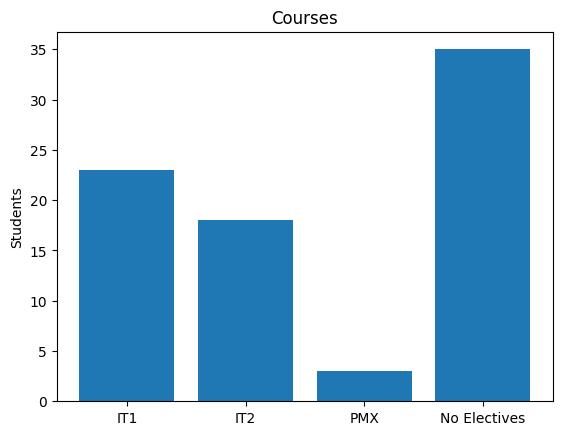

In [304]:
fig, ax = plt.subplots()

courses = ['IT1', 'IT2', 'PMX', 'No Electives']
n_it1 = df['IT1'].value_counts()['Informasjonsteknologi 1 (IT1)']
n_it2 = df['IT2'].value_counts()['Informasjonsteknologi 2 (IT2)']
n_pmx = df['PMX'].value_counts()['Programmering og modellering X']
n_noelectives = df['NoElective'].value_counts()[True]
counts = [n_it1, n_it2, n_pmx, n_noelectives]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Math Courses
The most common math courses available in secondary school are:
 * Practical Math 1 (1P)
 * Practical Math 2 (2P)
 * Theoretical Math 1 (1T)
 * Social Science Math 1 (S1)
 * Social Science Math 2 (S2)
 * Natural Science Math 1 (R1)
 * Natural Science Math 2 (R2)

The majority of students who took the test belonged to STEM fields, where the typical admission requirement includes S1 and S2 or R1 mathematics. Certain math-intensive study programs may also demand R2 mathematics. Notably, most students had completed the Natural Science Math courses (see plot below), which is the most advanced option.

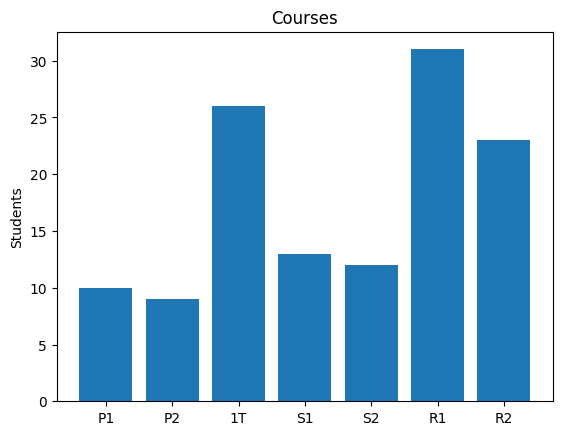

In [305]:
fig, ax = plt.subplots()

courses = ['P1', 'P2', '1T', 'S1', 'S2', 'R1', 'R2']
n_p1 = df['P1'].value_counts()['1P']
n_p2 = df['P2'].value_counts()['2P']
n_1t = df['T1'].value_counts()['1T']
n_s1 = df['S1'].value_counts()['S1']
n_s2 = df['S2'].value_counts()['S2']
n_r1 = df['R1'].value_counts()['R1']
n_r2 = df['R2'].value_counts()['R2']
counts = [n_p1, n_p2, n_1t, n_s1, n_s2, n_r1, n_r2]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who have at least 30 hours of outside experience with either block based or text based programming.

OutsideExperience
Nei    42
Ja     18
Name: count, dtype: int64
OutsideExperience
Nei    0.7
Ja     0.3
Name: proportion, dtype: float64


<Axes: ylabel='count'>

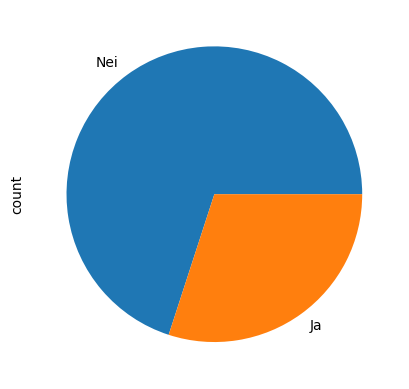

In [306]:
outside_column = "OutsideExperience"

print(df[outside_column].value_counts())
print(df[outside_column].value_counts(normalize=True))
df[outside_column].value_counts().plot.pie()

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. We also take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [307]:
# Configurations
bins = 23
edgecolor = 'red'
alpha = 0.5

## Main Result
A histogram of the total score of the students. Maximum score: 22.6.

Mean: 13.293
Standard deviation: 5.804


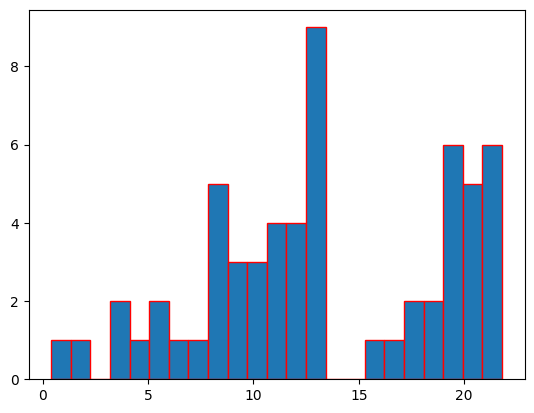

In [308]:
x = df['Total']

mean = df.loc[:, 'Total'].mean()
sd = df.loc[:, 'Total'].std()
print(f'Mean: {round(mean, 3)}')
print(f'Standard deviation: {round(sd, 3)}')


plt.hist(x, edgecolor=edgecolor, bins=bins)
plt.show() 

In [309]:
def compare_distributions(x, y, x_label, y_label):
    mean = x.mean()
    sd = x.std()
    print(f'Mean of {x_label}: {round(mean, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()
    
    mean = y.mean()
    sd = y.std()
    print(f'Mean of {y_label}: {round(mean, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x))
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.legend(loc='upper right')
    plt.show()

## Prior Programming Experience in Secondary School
In the initial segment of the test, we inquired with the students regarding their prior exposure to
programming before to commencing their higher education studies.

### Graduation Year
The educational reforms outlined in LK20 were introduced in the year 2020, resulting in programming becoming a compulsory component solely for those students who graduated in 2023 and onward.

Mean of 2023: 16.008
Standard deviation of 2023: 5.143

Mean of before 2023: 10.97
Standard deviation of before 2023: 5.361


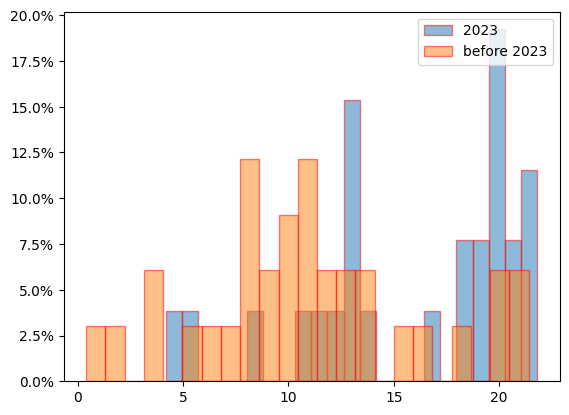

In [310]:
x = df[(df['GraduateYear'] == '2023')]['Total']
y = df[(df['GraduateYear'].isin(['Før 2020', '2020', '2021 - 2022']))]['Total']

x_label = '2023'
y_label = 'before 2023'

compare_distributions(x, y, x_label, y_label)

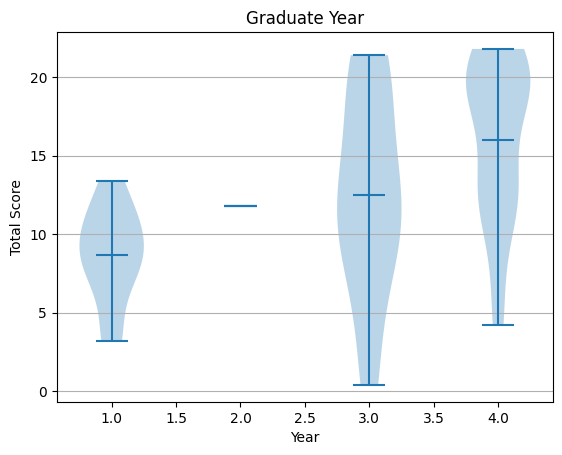

In [311]:
fig, axes = plt.subplots()

axes.violinplot(dataset = [df[df.GraduateYear == 'Før 2020']["Total"].values,
                           df[df.GraduateYear == '2020']["Total"].values,
                           df[df.GraduateYear == '2021 - 2022']["Total"].values,
                           df[df.GraduateYear == '2023']["Total"].values],
                           
                           showmeans=True)

axes.set_title('Graduate Year')
axes.yaxis.grid(True)
axes.set_xlabel('Year')
axes.set_ylabel('Total Score')

plt.show()

### Gender

Mean of women: 10.539
Standard deviation of women: 5.116

Mean of men: 15.274
Standard deviation of men: 5.504


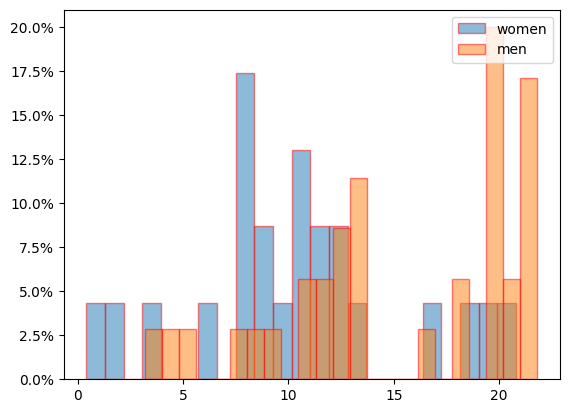

In [312]:
x = df[(df['Gender'] == 'f')]['Total']
y = df[(df['Gender'] == 'm')]['Total']

x_label = 'women'
y_label = 'men'

compare_distributions(x, y, x_label, y_label)

# Compare two groups

Mean of UiB: nan
Standard deviation of UiB: nan

Mean of UiO: 13.293
Standard deviation of UiO: 5.804


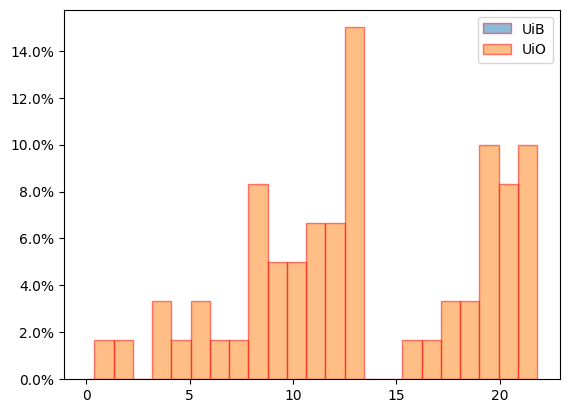

In [313]:
# Select which student groups you want to compare
x = df[(df['Institution'] == 'UiB')]['Total']
y = df[(df['Institution'] == 'UiO')]['Total']

# Change lables as desired
x_label = 'UiB'
y_label = 'UiO'

compare_distributions(x, y, x_label, y_label)

# Programming Tasks
Every task featured in the test pertained to a designated concept category. The follwing cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [314]:
def correctnes_rate(columns, category, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        task_mean = df.loc[:, column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{category:15s} {correct_answer_rate*100:3.2f} %')

In [315]:
# Booleans
boolean_columns = ["100 == 100", "42 != 25", "not (100 == 100)", "(10*2) > 9", "100 >= 100", "99 >= 100", "100 != (50*2)", "(14/2) > 7 ", "(5 < 7) and (4 > 5)", "(3 < 7) and (7 < 9)", "(5 < 7) or (4 > 5)", "and 500 == 100", "(False != False) == (True != True)", "(not True) or False", "False (not False)", "True and False", "True and (False or True)"]
correctnes_rate(boolean_columns, "Booleans", task_weight=0.2)

# Variables
variable_columns = ["Variables1", "Variables2"]
correctnes_rate(variable_columns, "Variables")

# Conditionals
conditional_columns = ["Conditionals1", "Conditionals2", "Conditionals3"]
correctnes_rate(conditional_columns, "Conditionals")

# Loops
loop_columns = ["Loops1", "Loops2"]
correctnes_rate(loop_columns, "Loops")

# Lists
list_columns = ["Lists1", "Lists2", "Lists3"]
correctnes_rate(list_columns, "Lists")

# Functions
function_columns = ["Functions1", "Functions2", "Functions3", "Functions4", "Functions5", "Functions6"]
correctnes_rate(function_columns, "Functions")

Booleans        63.82 %
Variables       85.00 %
Conditionals    85.00 %
Loops           48.33 %
Lists           37.78 %
Functions       50.28 %


## Tasks
To gain a deeper understanding of the students’ knowledge and comprehension of specific programming concepts, it is important to analyze their performance on these concepts. 

In [316]:
def print_task_result(task_column, df_results, df_tasks, n_answers=5, verbose_correct_answers=True):
    '''
    Print number of correct (1) and incorrect (0) responses.
    Print the top 5 most common answers.
    '''
    if verbose_correct_answers:
        print("Number of correct responses:")
        print(df_results[task_column].value_counts())
        print()
    
    print(f"Top {n_answers} most common answers:")
    print(df_tasks[task_column].value_counts()[:n_answers])

## Booleans

### Booleans 1
What do these boolean expressions evaluate to?

<img src="images/Booleans1.png" alt="drawing" width="300"/>

In [317]:
print_task_result("100 == 100", df, df_tasks, 3, False)
print()
print_task_result("42 != 25", df, df_tasks, 3, False)
print()
print_task_result("not (100 == 100)", df, df_tasks, 3, False)
print()
print_task_result("(10*2) > 9", df, df_tasks, 3, False)
print()
print_task_result("100 >= 100", df, df_tasks, 3, False)
print()
print_task_result("99 >= 100", df, df_tasks, 3, False)

Top 3 most common answers:
100 == 100
True     58
Error     1
Name: count, dtype: int64

Top 3 most common answers:
42 != 25
True     35
False    12
Error    10
Name: count, dtype: int64

Top 3 most common answers:
not (100 == 100)
Error    38
False    17
True      2
Name: count, dtype: int64

Top 3 most common answers:
(10*2) > 9
True     56
Error     1
False     1
Name: count, dtype: int64

Top 3 most common answers:
100 >= 100
True     46
False     9
Error     2
Name: count, dtype: int64

Top 3 most common answers:
99 >= 100
False    55
Error     1
True      1
Name: count, dtype: int64


### Booleans 2
What do these boolean expressions evaluate to?

<img src="images/Booleans2.png" alt="drawing" width="300"/>

In [318]:
print_task_result("100 != (50*2)", df, df_tasks, 3, False)
print()
print_task_result("(14/2) > 7 ", df, df_tasks, 3, False)
print()
print_task_result("(5 < 7) and (4 > 5)", df, df_tasks, 3, False)
print()
print_task_result("(3 < 7) and (7 < 9)", df, df_tasks, 3, False)
print()
print_task_result("(5 < 7) or (4 > 5)", df, df_tasks, 3, False)
print()
print_task_result("and 500 == 100", df, df_tasks, 3, False)

Top 3 most common answers:
100 != (50*2)
False    41
Error    10
True      6
Name: count, dtype: int64

Top 3 most common answers:
(14/2) > 7 
False    53
True      2
Error     2
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) and (4 > 5)
False    49
Error     4
True      3
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) and (7 < 9)
True     53
Error     3
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) or (4 > 5)
True     36
Error    11
False     9
Name: count, dtype: int64

Top 3 most common answers:
and 500 == 100
Error    43
False    14
Name: count, dtype: int64


### Booleans 3
What do these boolean expressions evaluate to?

<img src="images/Booleans3.png" alt="drawing" width="300"/>

In [319]:
print_task_result("(False != False) == (True != True)", df, df_tasks, 3, False)
print()
print_task_result("(not True) or False", df, df_tasks, 3, False)
print()
print_task_result("False (not False)", df, df_tasks, 3, False)
print()
print_task_result("True and False", df, df_tasks, 3, False)
print()
print_task_result("True and (False or True)", df, df_tasks, 3, False)

Top 3 most common answers:
(False != False) == (True != True)
True     31
Error    17
False     8
Name: count, dtype: int64

Top 3 most common answers:
(not True) or False
False    23
True     16
Error    16
Name: count, dtype: int64

Top 3 most common answers:
False (not False)
Error    32
False    13
True      8
Name: count, dtype: int64

Top 3 most common answers:
True and False
Error    23
False    22
True     11
Name: count, dtype: int64

Top 3 most common answers:
True and (False or True)
Error    27
True     24
False     5
Name: count, dtype: int64


## Variables

### Variables 1
What does this code snippet print?

![Variables1](images/Variables1.png)

In [320]:
print_task_result("Variables1", df, df_tasks)

Number of correct responses:
Variables1
1    59
0     1
Name: count, dtype: int64

Top 5 most common answers:
Variables1
8    59
Name: count, dtype: int64


### Variables 2

What does this code snippet print?

<img src="images/Variables2.png" alt="drawing" width="200"/>


In [321]:
print_task_result("Variables2", df, df_tasks)

Number of correct responses:
Variables2
1    43
0    17
Name: count, dtype: int64

Top 5 most common answers:
Variables2
21    43
26    11
16     2
10     1
18     1
Name: count, dtype: int64


## Conditionals

### Conditionals 1

What does this code snippet print?

<img src="images/Conditionals1.png" alt="drawing" width="200"/>

In [322]:
print_task_result("Conditionals1", df, df_tasks)

Number of correct responses:
Conditionals1
1    52
0     8
Name: count, dtype: int64

Top 5 most common answers:
Conditionals1
Second      49
second       3
First        2
"Second"     1
Name: count, dtype: int64


### Conditionals 2

What must be placed at the red line such that 15 is printed?

<img src="images/Conditionals2.png" alt="drawing" width="200"/>

In [323]:
print_task_result("Conditionals2", df, df_tasks)

Number of correct responses:
Conditionals2
1    48
0    12
Name: count, dtype: int64

Top 5 most common answers:
Conditionals2
!=     48
not     5
==      2
<       1
Name: count, dtype: int64


### Conditionals 3

What does this code snippet print?

<img src="images/Conditionals3.png" alt="drawing" width="200"/>

In [324]:
print_task_result("Conditionals3", df, df_tasks)

Number of correct responses:
Conditionals3
1    53
0     7
Name: count, dtype: int64

Top 5 most common answers:
Conditionals3
15    53
20     1
Name: count, dtype: int64


## Loops

### Loops 1

What does this code snippet print?

<img src="images/Loops1.png" alt="drawing" width="200"/>

In [325]:
print_task_result("Loops1", df, df_tasks)

Number of correct responses:
Loops1
0    30
1    30
Name: count, dtype: int64

Top 5 most common answers:
Loops1
21        30
5          4
6          3
1          2
123456     2
Name: count, dtype: int64


### Loops 2

What does this code snippet print?

<img src="images/Loops2.png" alt="drawing" width="200"/>

In [326]:
print_task_result("Loops2", df, df_tasks)

Number of correct responses:
Loops2
0    32
1    28
Name: count, dtype: int64

Top 5 most common answers:
Loops2
6    28
2    13
3     4
8     3
4     2
Name: count, dtype: int64


## Lists

### Lists 1

What does this code snippet print?

<img src="images/Lists1.png" alt="drawing" width="200"/>

In [327]:
print_task_result("Lists1", df, df_tasks)

Number of correct responses:
Lists1
0    32
1    28
Name: count, dtype: int64

Top 5 most common answers:
Lists1
4     28
-3    18
0      5
5      1
Name: count, dtype: int64


### Lists 2

What does this code snippet print?

<img src="images/Lists2.png" alt="drawing" width="200"/>

In [328]:
print_task_result("Lists2", df, df_tasks)

Number of correct responses:
Lists2
0    36
1    24
Name: count, dtype: int64

Top 5 most common answers:
Lists2
102    24
101    21
0       2
100     1
105     1
Name: count, dtype: int64


### Lists 3

What does this code snippet print?

<img src="images/Lists3.png" alt="drawing" width="200"/>

In [329]:
print_task_result("Lists3", df, df_tasks)

Number of correct responses:
Lists3
0    44
1    16
Name: count, dtype: int64

Top 5 most common answers:
Lists3
-10    16
8       6
4       5
0       4
-5      4
Name: count, dtype: int64


## Functions

### Functions 1

What does this code snippet print?

<img src="images/Functions1.png" alt="drawing" width="200"/>

In [330]:
print_task_result("Functions1", df, df_tasks)

Number of correct responses:
Functions1
1    44
0    16
Name: count, dtype: int64

Top 5 most common answers:
Functions1
13    44
5      1
67     1
0      1
Name: count, dtype: int64


### Functions 2

What does this code snippet print?

<img src="images/Functions2.png" alt="drawing" width="200"/>

In [331]:
print_task_result("Functions2", df, df_tasks)

Number of correct responses:
Functions2
0    30
1    30
Name: count, dtype: int64

Top 5 most common answers:
Functions2
100     30
42       5
0        3
4200     2
45       1
Name: count, dtype: int64


### Functions 3

What code must be written on line 5 so that the function returns the smallest number of the given list?

<img src="images/Functions3.png" alt="drawing" width="200"/>

In [332]:
print_task_result("Functions3", df, df_tasks)

Number of correct responses:
Functions3
0    37
1    23
Name: count, dtype: int64

Top 5 most common answers:
Functions3
min_number = number    23
number = min_number    14
continue                6
break                   5
Name: count, dtype: int64


### Functions 4

What does this code snippet print?

<img src="images/Functions4.png" alt="drawing" width="200"/>

In [333]:
print_task_result("Functions4", df, df_tasks)

Number of correct responses:
Functions4
1    31
0    29
Name: count, dtype: int64

Top 5 most common answers:
Functions4
7     31
5      4
3      2
9      2
10     2
Name: count, dtype: int64


### Functions 5

What does this code snippet print?

<img src="images/Functions5.png" alt="drawing" width="200"/>

In [334]:
print_task_result("Functions5", df, df_tasks)

Number of correct responses:
Functions5
1    31
0    29
Name: count, dtype: int64

Top 5 most common answers:
Functions5
7    31
6     4
3     2
0     2
8     1
Name: count, dtype: int64


### Functions 6

What does this code snippet print?

<img src="images/Functions6.png" alt="drawing" width="200"/>

In [335]:
print_task_result("Functions6", df, df_tasks)

Number of correct responses:
Functions6
0    38
1    22
Name: count, dtype: int64

Top 5 most common answers:
Functions6
10    22
9      5
6      3
8      2
4      1
Name: count, dtype: int64
